### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
# fix is_list_like name issue before import pandas_datareader
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web  #0.50 to read yahoo

### Ejercicio 1.

#### Crea un array de 450 enteros aleatorios entre -10 y 10.

In [3]:
random = np.random.randint(-10, 10, 450)

#### Redimensiónalo como matriz de 5x70. ¿Hay algún problema? Si lo hay, corrígelo.

In [4]:
# below does not work 450 != 350
# reshaped = random.reshape((5, 70))

In [5]:
reshaped = random.reshape((5, 90))

#### Obtén con una función que encuentres en las bibliotecas de NumPy los datos no duplicados.

In [6]:
uniques = np.unique(random)

#### Sobre los datos no duplicados, obtén la media y los cuartiles, buscando las funciones adecuadas.

In [7]:
avg = uniques.mean()
quantiles = np.quantile(uniques, [0.00, 0.25, 0.50 , 0.75, 1.00])

#### Dibuja el histograma y los cuartiles del array. Nota: para dibujar líneas se pueden utilizar funciones como vlines().

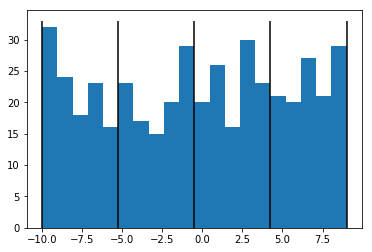

In [8]:
plot = plt.hist(random, bins= 20)
ymin = 0
ymax = np.max(plot[0]) + 1
plt.vlines(quantiles, ymin, ymax)

### Ejercicio 2.

#### Crea dos arrays de 100 elementos con números aleatorios de distribuciones diferentes, pero en un rango de valores similar.

In [9]:
arrayBinomial = np.random.binomial(29, 0.30, 100)
arrayGeometric = np.random.geometric(.30, 100)

#### Dibuja sus histogramas y compáralos.

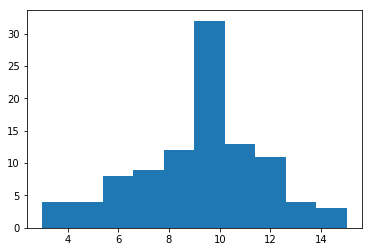

In [10]:
plotBinomial = plt.hist(arrayBinomial, bins= 10)

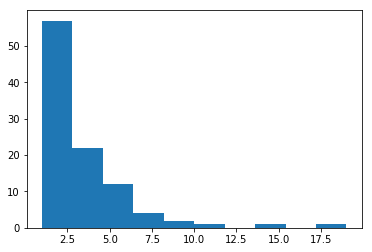

In [11]:
plotGeometric = plt.hist(arrayGeometric, bins= 10)

#### ¿Con qué método estadístico podrías contrastar si las dos muestras provienen de la misma distribución? ¿En qué paquete del stack científico de Python podría estar?

##### Con el método ```describe``` de ```scipy.stats``` pueden verse las estadísticas básicas de una distribución

In [12]:
stats.describe(arrayBinomial)

DescribeResult(nobs=100, minmax=(3, 15), mean=9.21, variance=6.187777777777777, skewness=-0.25712918491155706, kurtosis=-0.3740809413308779)

In [13]:
stats.describe(arrayGeometric)

DescribeResult(nobs=100, minmax=(1, 19), mean=3.2, variance=8.484848484848486, skewness=2.6769614662773753, kurtosis=9.656530612244898)

### Ejercicio 3.

### Ejercicio 3.

#### Si no lo conocías, lee el ejemplo de qué es una media móvil aquí: http://www.investopedia.com/terms/m/movingaverage.asp (consideramos solo las medias móviles simples)

#### Genera un array de supuesta cotizaciones de un valor de la bolsa duante un período. Nota: Puedes simularlo con un “random walk” a partir de un valor de cotización inicial

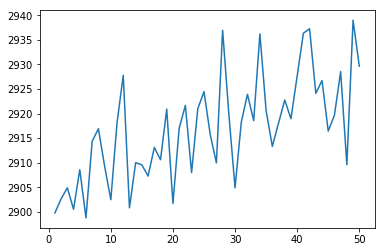

In [14]:
base = 2930
length = 50
width = 30
window = 5
# make some variations with growth tendency
lsSort = np.linspace(-width/2, width/10, length)
lsUns1 = np.random.choice(lsSort, length)
lsUns2 = np.random.choice(lsUns1, length)
variations = lsSort + lsUns1 + lsUns2
# get one random array
random = np.random.random(length)
# mix random and variations
rw = ((random * 10) + variations) + base
plt.plot(np.arange(1, length + 1), rw)

#### Busca una función en el stack científico de Python que implemente la media móvil y aplícalo a los datos generados.

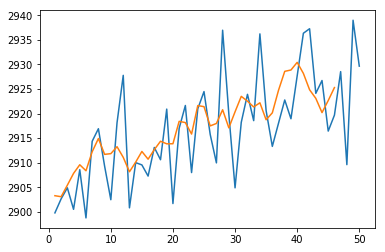

In [15]:
def pdMovingAverage(values, window):
    df = pd.DataFrame(rw)
    ma = df.rolling(window=window).mean().dropna()
    return ma
pdMa = pdMovingAverage (rw, window)
plt.plot(np.arange(1, length + 1), rw)
plt.plot(np.arange(1, len(pdMa) + 1), pdMa)

#### (**) Ahora haz tu propia implementación de la media móvil utilizando arrays de NumPy.

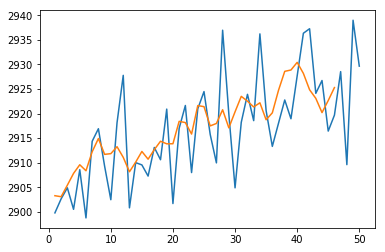

In [16]:
def customMovingAverage(values, window):
    weights = np.repeat(1.0, window)/window
    ma = np.convolve(values, weights, 'valid')
    return ma
customMa = customMovingAverage(rw, window)
plt.plot(np.arange(1, length + 1), rw)
plt.plot(np.arange(1, len(customMa) + 1), customMa)

#### Compara la eficiencia de tu versión y la de NumPy.

In [17]:
%timeit(pdMovingAverage (rw, window))
%timeit(customMovingAverage (rw, window))

1.71 ms ± 31.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.1 µs ± 205 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### (**) Investiga cómo obtener datos reales de un valor de la bolsa a partir de Yahoo Financials (si no lo consigues por programa, puedes descargarlo a un fichero a mano y leerlo después), y aplica la media móvil.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD7982F4E0>],
      dtype=object)

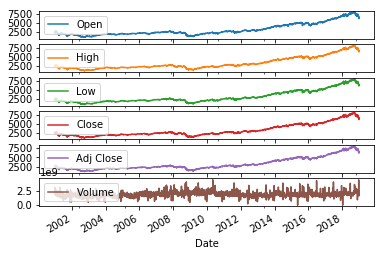

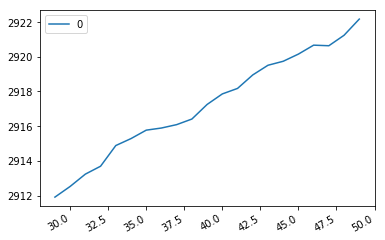

In [18]:
nasdaq = '^IXIC'
start = '2000-12-29'
end = '2018-12-29'
nasdaqDf = web.DataReader(nasdaq, 'yahoo', start, end)
nasdaqMa = pdMovingAverage(nasdaqDf, 30)
nasdaqDf.plot(subplots = True)
nasdaqMa.plot(subplots = True)

### Ejercicio 4. Entrada/salida de arrays NumPy (*)

##### NumPy tiene una categoría de funciones para grabar y recuperar arrays de disco: https://docs.scipy.org/doc/numpy/reference/routines.io.html. 
##### A partir del siguiente código:
```
import numpy as np
N = 10
a = np.random.uniform(size=N)
b = np.random.normal(size=N)
b
array([ 0. 52284741, 0. 23829581, -0. 49767523, 0. 54278876, 0. 27790099,
1. 94402675, -0. 3543395 , 0. 57639513, -0. 80058146, -0. 89837096])
```

In [19]:
N = 10
a = np.random.uniform(size=N)
b = np.random.normal(size=N)
a , b

(array([0.30478418, 0.24838687, 0.37033731, 0.68191926, 0.03434681,
        0.52329104, 0.31711863, 0.68990217, 0.81123381, 0.43661297]),
 array([-0.96940637, -1.29257434, -2.5685454 ,  2.20532741,  0.53685556,
         0.68362277,  0.05274228, -0.29206742, -0.62091329,  0.66110014]))

#### Guardar los arrays anteriores en formato específico de NumPy comprimido y formato de texto (sin comprimir).

In [20]:
fileC = 'compress.npz'
fileU = 'uncompress.npz'
np.savez(fileU,a=a,b=b)
np.savez_compressed(fileC,a=a,b=b)

#### Comparar las diferencias de espacio en disco desde el mismo Notebook, y ver sus contenidos con el comando head del sistema operativo.

In [21]:
!dir *.npz
!type compress.npz
!type uncompress.npz

 Volume in drive C is os
 Volume Serial Number is 48F1-458F

 Directory of C:\Users\David\OneDrive\uah\03_ead\Python\eadP

01/20/2019  02:16 PM               501 compress.npz
01/20/2019  09:49 AM               518 compressed.npz
01/20/2019  02:16 PM               610 uncompress.npz
               3 File(s)          1,629 bytes
               0 Dir(s)  26,421,927,936 bytes free
PK     ! ~r%š   Ð      a.npy›ìêÉÈPÆP­ž’Zœ\¤n¥ n“f¡®£ ž–_TR”˜Ÿ_”’
wKÌ)NŠg$¤ù†:š:
µ
ä®˜}ìMS/Û×åÈªœ>o¯ó3Çeöæëö3î}õ¸ôÔÞaeÔÜçSÚçlò¾qfßû#Û-¾®ö¾bÏqqÖÖµÂÏìõîÍZðõ¥=×bƒ–ò�·íPK     ! IŒ‹™   Ð      b.npy›ìêÉÈPÆP­ž’Zœ\¤n¥ n“f¡®£ ž–_TR”˜Ÿ_”’
wKÌ)NŠg$¤ù†:š:
µ
ä.¹‹†M	¬ï÷××ôæ&­û²ßí}`{bË�[·OmjZÂèÐµ,mûkÝ‡öÂÿÿß´yðÔ>Ïnu
'ãjûÕë�—ö»´êtµÞ{¼¿e¦_ånõ§ö PK      ! ~r%š   Ð              €    a.npyPK      ! IŒ‹™   Ð              €½   b.npyPK      f   y    
PK       ! ~r%Ð   Ð      a.npy“NUMPY v {'descr': '<f8', 'fortran_order': False, 'shape': (10,), }                       

#### Cargarlos de nuevo en memoria con nombres de variable diferentes.

In [22]:
au = np.load(fileU)['a']
bu = np.load(fileU)['b']

ac = np.load(fileC)['a']
bc = np.load(fileC)['b']

au, bu, ac, bc

(array([0.30478418, 0.24838687, 0.37033731, 0.68191926, 0.03434681,
        0.52329104, 0.31711863, 0.68990217, 0.81123381, 0.43661297]),
 array([-0.96940637, -1.29257434, -2.5685454 ,  2.20532741,  0.53685556,
         0.68362277,  0.05274228, -0.29206742, -0.62091329,  0.66110014]),
 array([0.30478418, 0.24838687, 0.37033731, 0.68191926, 0.03434681,
        0.52329104, 0.31711863, 0.68990217, 0.81123381, 0.43661297]),
 array([-0.96940637, -1.29257434, -2.5685454 ,  2.20532741,  0.53685556,
         0.68362277,  0.05274228, -0.29206742, -0.62091329,  0.66110014]))

#### (opcional) Guardar los dos arrays en un solo fichero de texto y recuperarlos de nuevo. Pista: utilizar tuplas.

In [23]:
file = 'text.txt'
ab = (a, b)
np.savetxt(file,ab)
text = np.loadtxt(file)
at = text[0]
bt = text[1]

at, bt

(array([0.30478418, 0.24838687, 0.37033731, 0.68191926, 0.03434681,
        0.52329104, 0.31711863, 0.68990217, 0.81123381, 0.43661297]),
 array([-0.96940637, -1.29257434, -2.5685454 ,  2.20532741,  0.53685556,
         0.68362277,  0.05274228, -0.29206742, -0.62091329,  0.66110014]))

### 5. Generación de datos - distribuciones de SciPy (**)

#### Queremos ahora estudiar la distribución de Pareto.

#### Representar las funciones de densidad y de probabilidad similares a las de Wikipedia. Hallar el percentil del 80% con k=1

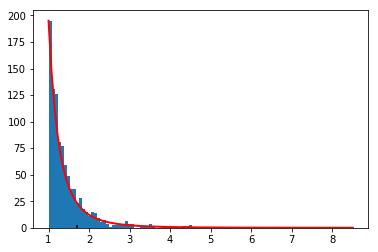

In [24]:
alpha, m = 3., 1.  # shape and mode
size = 1000
pareto = (np.random.pareto(alpha, size) + 1) * m
count, bins, _ = plt.hist(pareto, 100)
fit = alpha*m**alpha / bins**(alpha+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
p80 = np.quantile(pareto,.8)
plt.vlines(p80, 0, alpha)

### 6. Generación de datos - otras distribuciones

##### Si no encontrásemos la distribución en las bibliotecas de ScyPy pero la conocemos ("sabemos la fórmula"), siempre podemos generar los datos aleatorios generando un array con los datos en el rango en que está definida, y después tomando aleatoriamente un número de elementos de allí ("con reemplazo"). Vamos a pensar si tenemos esta función: f(t) definida por:
<img src="function6.png">

#### Dibujar la función en el rango [0, 10]

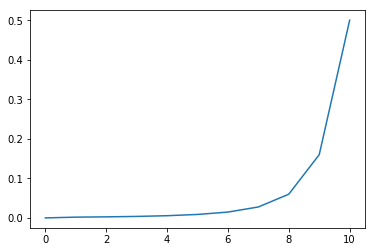

In [25]:
def function6(values):
    ret = np.empty(values.shape)
    for index, value in enumerate(values):
        # plt.plot(np.sort(random), randomf6)print(value, index)
        if value < 0:
            ret[index] = 0
        else:
            ret[index] = (2*value) / ((1+(value**2))**2)
    return np.sort(ret)

values = np.arange(0,11)        
f6 = function6(values)
plt.plot(values, f6)

#### Generar una muestra aleatoria de la misma

In [26]:
random = np.random.randint(-10,10,100)
randomf6 = function6(random)

#### Dibujar esa muestra y su histograma

(array([85.,  3.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  6.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <a list of 10 Patch objects>)

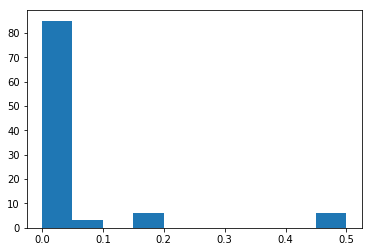

In [27]:
plt.hist(randomf6, bins = 10)

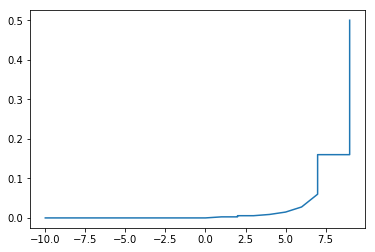

In [28]:
plt.plot(np.sort(random), randomf6)